## Long Short-Term Memory 

In this assignment, we will learn about LSTM models. We will create an LSTM model for time series prediction.

In [0]:
pip install tensorflow --upgrade -q

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 450kB 41.7MB/s 
     |████████████████████████████████| 3.8MB 56.4MB/s 
     |████████████████████████████████| 81kB 13.4MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.


In [0]:
import numpy as np
import os
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Below is a function for loading time series data collected by sensors. There are 9 different files, We have data about body acceleration, body gyro, and total acceleration for the x, y, and z axis

In [0]:
def load_func(path, file_ind=False):
    data_list = []
    if file_ind:
        filenames = [path]
    else:
        files = os.listdir(path)
        filenames = [path + '/' + f for f in files]
    for f in filenames:
        dataframe = pd.read_csv(f, header=None, delim_whitespace=True)
        data_list.append(dataframe.values)
    if len(data_list) > 1:
        return np.dstack(data_list)
    else:
        return data_list[0]

In [0]:
os.listdir('/content/drive/My Drive/Colab Datasets/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/')

['body_acc_x_train.txt',
 'body_acc_y_train.txt',
 'body_acc_z_train.txt',
 'body_gyro_x_train.txt',
 'body_gyro_y_train.txt',
 'body_gyro_z_train.txt',
 'total_acc_x_train.txt',
 'total_acc_y_train.txt',
 'total_acc_z_train.txt']

In [0]:
X_train = load_func("/content/drive/My Drive/Colab Datasets/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals")
X_test = load_func("/content/drive/My Drive/Colab Datasets/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals")
y_train_cat = load_func('/content/drive/My Drive/Colab Datasets/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', True)
y_test_cat = load_func('/content/drive/My Drive/Colab Datasets/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', True)

Print the dimensions of both the predictor variables and the target.

In [0]:
# Answer below:
X_train.shape, X_test.shape


((7352, 128, 9), (2947, 128, 9))

In [0]:
y_train_cat.shape, y_test_cat.shape

((7352, 1), (2947, 1))

The target variable is categorical. One hot encode the target variable.

In [0]:
# Answer below:
Y_train = to_categorical(y_train_cat, 7)
Y_test = to_categorical(y_test_cat, 7)

Create a model containing an LSTM layer with unit size 100, and input shape that is the tuple containing the number of columns in X and the number of files in X.

The next layer is a dropout layer. Choose 0.5 for the proportion. Then add a dense layer of unit size 100 and finally an output dense layer. 

In [0]:
# Answer below:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2]) ))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))


Print the model summary to ensure you have the correct number of parameters.

In [0]:
# Answer below:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               44000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 707       
Total params: 54,807
Trainable params: 54,807
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Select the appropriate activation, loss, and optimizer.

Run the model for 10 epochs with a batch size of 80.

In [0]:
# Answer below:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=80, epochs=10, validation_data=(X_test, Y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 2s 323us/sample - loss: 1.3682 - accuracy: 0.4300 - val_loss: 1.2945 - val_accuracy: 0.4235
Epoch 2/10
7352/7352 [==============================] - 1s 136us/sample - loss: 1.0169 - accuracy: 0.5817 - val_loss: 0.8598 - val_accuracy: 0.6345
Epoch 3/10
7352/7352 [==============================] - 1s 136us/sample - loss: 0.6737 - accuracy: 0.7155 - val_loss: 0.6982 - val_accuracy: 0.7282
Epoch 4/10
7352/7352 [==============================] - 1s 139us/sample - loss: 0.5463 - accuracy: 0.7954 - val_loss: 0.5668 - val_accuracy: 0.8012
Epoch 5/10
7352/7352 [==============================] - 1s 142us/sample - loss: 0.3641 - accuracy: 0.8758 - val_loss: 0.4649 - val_accuracy: 0.8307
Epoch 6/10
7352/7352 [==============================] - 1s 153us/sample - loss: 0.2238 - accuracy: 0.9214 - val_loss: 0.3623 - val_accuracy: 0.8704
Epoch 7/10
7352/7352 [==============================] - 1s 159us

In [0]:
history=model.fit(X_train, Y_train, batch_size=80, epochs=30, validation_data=(X_test, Y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 2s 320us/sample - loss: 1.2652 - accuracy: 0.4661 - val_loss: 1.0611 - val_accuracy: 0.5592
Epoch 2/30
7352/7352 [==============================] - 1s 135us/sample - loss: 0.8753 - accuracy: 0.6296 - val_loss: 0.7461 - val_accuracy: 0.6783
Epoch 3/30
7352/7352 [==============================] - 1s 139us/sample - loss: 0.6211 - accuracy: 0.7338 - val_loss: 0.6295 - val_accuracy: 0.7448
Epoch 4/30
7352/7352 [==============================] - 1s 139us/sample - loss: 0.5097 - accuracy: 0.7975 - val_loss: 0.5792 - val_accuracy: 0.8045
Epoch 5/30
7352/7352 [==============================] - 1s 140us/sample - loss: 0.4517 - accuracy: 0.8441 - val_loss: 0.5618 - val_accuracy: 0.7862
Epoch 6/30
7352/7352 [==============================] - 1s 138us/sample - loss: 0.3228 - accuracy: 0.8919 - val_loss: 0.5755 - val_accuracy: 0.8151
Epoch 7/30
7352/7352 [==============================] - 1s 142us

In [0]:
import matplotlib.pyplot as plt


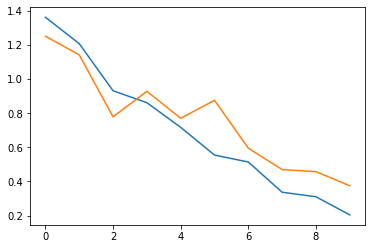

In [0]:
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'] )
plt.show()

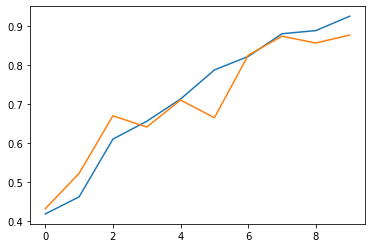

In [0]:
plt.plot(history.history['accuracy'] )
plt.plot(history.history['val_accuracy'] )
plt.show()

Print the confusion matrix for the test data.

In [0]:
# Answer below:
from sklearn.metrics import confusion_matrix


In [0]:
y_predict = model.predict_classes(X_test)

In [0]:
y_predict

array([5, 5, 5, ..., 2, 2, 2])

In [0]:
y_test_cat

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]])

In [0]:
confusion_matrix(y_test_cat, y_predict) 

array([[451,  21,  24,   0,   0,   0],
       [  7, 429,  34,   1,   0,   0],
       [  0,   1, 419,   0,   0,   0],
       [  0,   1,   0, 313, 177,   0],
       [  0,   1,   0,  35, 496,   0],
       [  0,  27,   0,   0,   0, 510]])